In [1]:
import os
os.chdir('JQ/PI-SDE')
import pandas as pd
import torch
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
from src.evaluation import derive_model
from matplotlib.gridspec import GridSpec

from joblib import load
um = load('data/Veres/alltime/um_transformer.joblib')

In [6]:
path = "RESULTS/softplus-400_400-0.5-const-0.1-0.1-0.005/alltime/seed_0/config.pt"
config = SimpleNamespace(**torch.load(path))
model, x, y, device = derive_model(config, ckpt_name = 'epoch_003000')

x_all = torch.cat(x)
x_all_2dim = um.transform(x_all.cpu().numpy())

In [8]:
y_all_train = list()
y_all_train.extend(np.ones(x[0].shape[0]) * config.start_t)
for i in range(len(config.train_t)):
    t = (config.train_t)[i] 
    y_all_train.extend(np.ones(x[i+1].shape[0])* t )

xt = torch.cat([ x_all, torch.tensor(y_all_train).unsqueeze(1)], dim=1)
potential = model._func._pot(xt.float().to(device)).detach().cpu().numpy()[:,0] 

ci = np.argsort(potential)

In [9]:
potential_PRESCIENT = np.load('Results_OtherMethods/Veres/PRESCIENT/alltime/none/seed_0/potential.npy')
ci_PRESCIENT = np.argsort(potential_PRESCIENT)

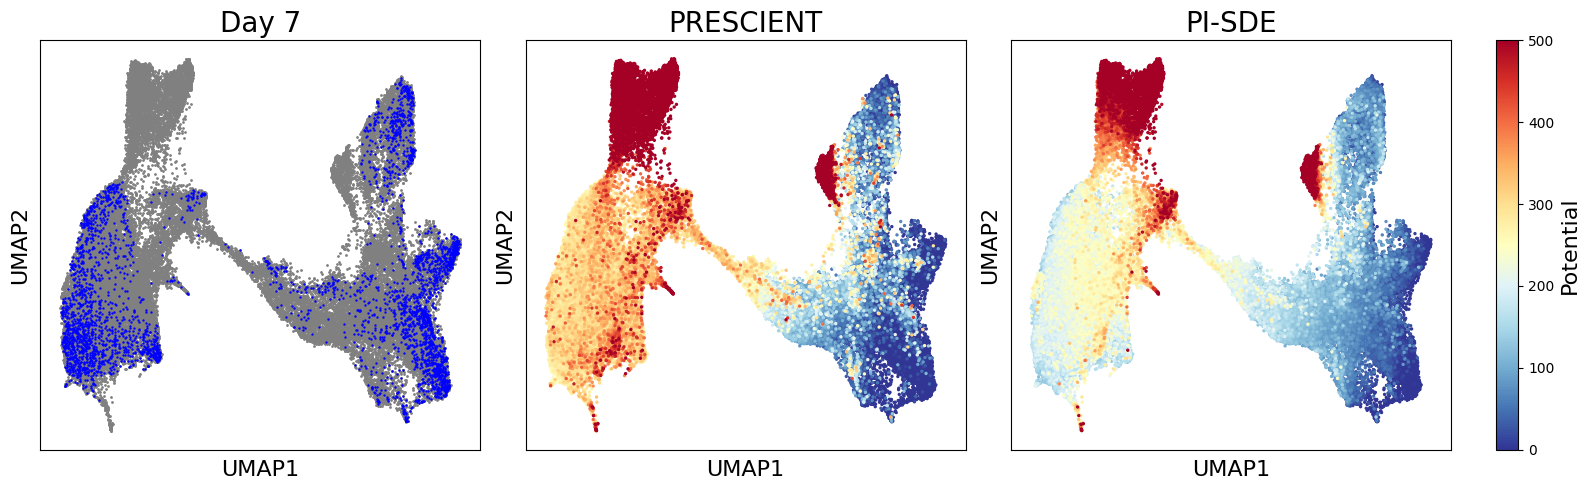

In [18]:
gs = GridSpec(1, 4, width_ratios=[1,1, 1, 0.05])

plt.figure(figsize=(16, 5))
ax0 = plt.subplot(gs[0, 0])
ax0.scatter(x_all_2dim[:,0], x_all_2dim[:,1], color = 'gray',s=1)
ax0.scatter(x_all_2dim[:,0][np.where(np.array(y_all_train) == 7)[0]], x_all_2dim[:,1][np.where(np.array(y_all_train) == 7)[0]],color = 'blue', s=0.5)
ax0.set_title('Day 7',fontsize=20)
ax0.set_xlabel('UMAP1',fontsize = 16)
ax0.set_ylabel('UMAP2',fontsize = 16)
ax0.set_xticks([])
ax0.set_yticks([])


ax1 = plt.subplot(gs[0, 1])
scatter1 = ax1.scatter(x_all_2dim[:,0][ci_PRESCIENT], x_all_2dim[:,1][ci_PRESCIENT], c = potential_PRESCIENT[ci_PRESCIENT], 
                        s = 2, vmin = 0 , vmax = 500, cmap='RdYlBu_r')
ax1.set_title('PRESCIENT',fontsize=20)
ax1.set_xlabel('UMAP1',fontsize = 16)
ax1.set_ylabel('UMAP2',fontsize = 16)
ax1.set_xticks([])
ax1.set_yticks([])

ax2 = plt.subplot(gs[0, 2])
scatter2 = ax2.scatter(x_all_2dim[:,0][ci], x_all_2dim[:,1][ci], c = potential[ci], 
                        s = 2, vmin = 0 , vmax = 500, cmap='RdYlBu_r')
ax2.set_title('PI-SDE',fontsize=20)
ax2.set_xlabel('UMAP1',fontsize = 16)
ax2.set_ylabel('UMAP2',fontsize = 16)
ax2.set_xticks([])
ax2.set_yticks([])


ax_cbar = plt.subplot(gs[0, 3])
cbar = plt.colorbar(scatter2, cax=ax_cbar)
cbar.set_label('Potential', fontsize=16)
plt.tight_layout()
plt.show()